# Weekly demand graph

In [8]:
import pandas as pd

trip_path = "tripdata_excerpt_2011-2-1_2011-2-28_ids.csv"
df_demand = pd.read_csv(trip_path, index_col="pickup_datetime",  parse_dates = True, comment = "#")


### Select first week of February 2011

In [9]:
max_vehicle_capacity = 4

df_demand_7 = df_demand.loc['2011-02-01 00:00:00':'2011-02-07 23:59:59'][["passenger_count"]]
df_demand_7_cap4 = df_demand_7[df_demand_7["passenger_count"] <= max_vehicle_capacity]
df_demand_7_cap4 = df_demand_7_cap4.sort_values(by='pickup_datetime')
print("Counts:", df_demand_7_cap4.passenger_count.value_counts())
print("Number of passengers < ", max_vehicle_capacity, ":", df_demand_7_cap4['passenger_count'].sum())

print(df_demand_7_cap4.describe())
df_demand_7_cap4.head()

print("Percentages:", ["{}={:.2%}".format(k, v/len(df_demand_7_cap4)) for k,v in df_demand_7_cap4.passenger_count.value_counts().items()])

Counts: 1    1220458
2     262199
3      71774
4      30641
Name: passenger_count, dtype: int64
Number of passengers <  4 : 2082742
       passenger_count
count     1.585072e+06
mean      1.313973e+00
std       6.495711e-01
min       1.000000e+00
25%       1.000000e+00
50%       1.000000e+00
75%       1.000000e+00
max       4.000000e+00
Percentages: ['1=77.00%', '2=16.54%', '3=4.53%', '4=1.93%']


In [10]:
print("Number of passengers:", df_demand_7_cap4['passenger_count'].sum())
print("Number of requests:", len(df_demand_7_cap4))

Number of passengers: 2082742
Number of requests: 1585072


### Creating passenger data

In [11]:
for i in range(1, max_vehicle_capacity+1):
    df_demand_7_cap4[str(i)] = df_demand_7_cap4.passenger_count.apply(lambda x: 1 if x==i else 0)
#df_demand_7_cap4 = df_demand_7_cap4.drop('passenger_count', axis = 1)
df_demand_7_cap4_30s = df_demand_7_cap4.resample('30s').sum()

max600 = df_demand_7_cap4_30s.resample('600s').max()
min300 = df_demand_7_cap4_30s.resample('301s').min()

df_demand_7_cap4_30s.tail()

,passenger_count,1,2,3,4
pickup_datetime,,,,,
2011-02-07 23:57:30,43,23,5,2,1
2011-02-07 23:58:00,62,48,7,0,0
2011-02-07 23:58:30,25,15,5,0,0
2011-02-07 23:59:00,60,39,6,3,0
2011-02-07 23:59:30,25,20,1,1,0


In [12]:
all = pd.concat([max600,min300])
all = all.sort_index()
df_demand_7_cap4_30s = all

In [13]:
df_demand_7_cap4_30s_count = df_demand_7_cap4.resample('30s').count()
max(df_demand_7_cap4_30s_count.passenger_count)

243

[array([55, 18, 16, ..., 56, 10, 15], dtype=int64), array([16,  1,  1, ..., 17,  3,  1], dtype=int64), array([5, 0, 0, ..., 4, 0, 0], dtype=int64), array([2, 0, 0, ..., 4, 0, 0], dtype=int64)]


NameError: name 'week_day' is not defined

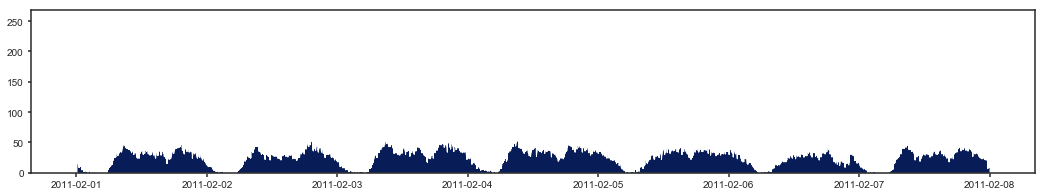

In [14]:
import os.path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

name_fig = "Demand.svg"

fontsize="xx-large"
fontsize_label="xx-large"

# Defining graph size
fig = plt.gcf()
fig.set_size_inches(18,3)

# Define axis
x = df_demand_7_cap4_30s.index.values
y = [df_demand_7_cap4_30s[str(i)].values for i in range(1, 5)]
print(y)


# Define axis details
print_details_axis = ("Time (h)", "#Passengers")
show_tick_label_x = True
label_y = ([0, 150, 300, 450, 600], ['0', '150', '300', '450', '600'])

smooth = None

# Smoth lines in y
if smooth:
    y = [gaussian_filter1d(i, sigma=smooth) for i in y]


# Choosing palette. Source: https://seaborn.pydata.org/tutorial/color_palettes.html
adrift_in_dreams_4 = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0']
pallete = adrift_in_dreams_4

# Defining graph style
sns.set_style("ticks")
sns.set_palette(sns.color_palette(pallete))

ax = plt.gca()
t_width = 1.5
ax.tick_params(width = t_width)
ax.spines['top'].set_linewidth(t_width)
ax.spines['right'].set_linewidth(t_width)
ax.spines['bottom'].set_linewidth(t_width)
ax.spines['left'].set_linewidth(t_width)


plt.stackplot(x, y[0], y[1], y[2], y[3])

# Setting x axis lijmits
x_min = datetime.strptime('2011-02-01T00:00:00','%Y-%m-%dT%H:%M:%S')
x_max = datetime.strptime('2011-02-08T00:00:00','%Y-%m-%dT%H:%M:%S')

# Definiing frequency of x axis labels
rangeDates = pd.date_range(start=x_min, end=x_max, freq="6h")
rangeDatesLabel = [str(int(d.strftime('%H'))) for d in rangeDates]

# Day of the week line separator
dashed_line_x = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S')

## DAY OF THE WEEK LABEL CONFIGURATION

# First date week
week_day_x = datetime.strptime('2011-02-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(hours = 10)

# Style of the background box
bbox_days = dict(boxstyle='square,pad=0.1',
                   alpha=0.5,
                   fc='white',
                   ec='none')

week_pos_y = 630

# Loop days of the week
for i in range(0,7):

    # Print week day
    plt.text(week_day_x,
         week_pos_y,
         week_day.strftime("%a"),
         fontsize='xx-large',
         bbox=bbox_days)

    week_day_x = week_day_x + timedelta(hours = 24)

### PRINTING DASHED LINES SEPARATING DAYS 
for i in range(0,6):

    # Print day separator
    dashed_line_x = dashed_line_x + timedelta(hours = 24)

    # White box below dashed line for constrast
    plt.axvline(x = dashed_line_x,
                linewidth=6,
                color='white',
                alpha=0.4)

    # Dashed line to separate week days
    plt.axvline(x = dashed_line_x,
                linewidth=1,
                color='black',
                linestyle='--')

# Print x, y axis labels
det_x, det_y = print_details_axis
if det_x:
    plt.xlabel(det_x, fontsize=fontsize_label)
if det_y:
    plt.ylabel(det_y, fontsize=fontsize_label)
    
# Remove white margins
plt.margins(0,0)

if show_tick_label_x:
    ticks_x = rangeDatesLabel
        
plt.xticks(rangeDates, ticks_x, fontsize=fontsize)

# Plot
l_y, t_y = label_y
if l_y is not None:
    plt.yticks(l_y,t_y,fontsize=fontsize)
else:
    plt.yticks(fontsize=fontsize)


plt.savefig(name_fig, bbox_inches="tight")

In [ ]:
# Python graphs: https://python-graph-gallery.com/
# Visualization with matplotlib: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.htmlimport matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pprint import pprint
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline
import os

sns.set()

def plot_vehicle_status_graph(instances_folder,
                              result_folder,
                              name_fig,
                              df = None,
                              replace = True,
                              smooth=None,
                              print_details = True,
                              fontsize = 'small',
                              fontsize_label = 'small',
                              show_tick_label_x = False,
                              label_y = (None, None, 'small'),
                              horizontal_legend = False,
                              fig_type = 'png',
                              custom_tw = (None, None),
                              day_sep_config = (None, None),
                              size_inches = (18,3),
                              nbins_y = 5,
                              x_data_format = ('1h', '%H'),
                              color_bg = "#FFE4E1",
                              print_details_axis = (None, None),
                              input_dic = None,
                              show_week_days = False,
                              show_day_separator = True,
                              linewidth = 1.5,
                              tick_length = 3,
                              show_service_rate = "Service rate: ",
                              msg = None):
    
    tw = 30
    th = 604800    
    
    # Standard data frequency
    # E.g., freq = {10min, 6h, 1d}, format = {'%H:%M', '%H'}
    x_freq, x_format = x_data_format
    
    # Get custom time window (.e.g., ('2011-02-01T00:00:00', '2011-02-06T00:00:00'))
    custom_tw_min, custom_tw_max = custom_tw
    
    
    # X series (dates)
    if not custom_tw_min:
        x_min = datetime.strptime('2011-02-01T00:00:00','%Y-%m-%dT%H:%M:%S')
    else:
        x_min = datetime.strptime(custom_tw_min,'%Y-%m-%dT%H:%M:%S')
    
    if not custom_tw_max:
        x_max = datetime.strptime(str(dic_th[th][1])[:-10],'%Y-%m-%dT%H:%M:%S')
    else:
        x_max = datetime.strptime(custom_tw_max, '%Y-%m-%dT%H:%M:%S')
        
    x_start = x_min + timedelta(seconds = tw)
    x_end = x_max + timedelta(seconds = tw)
    
    x_last_req = x_min + timedelta(seconds = th) + timedelta(seconds = tw)
    
    rangeDates = pd.date_range(start=x_start,
                               end=x_end,
                               freq=x_freq)
    
    rangeDatesLabel = [str(int(d.strftime(x_format))) for d in rangeDates]
    
    
    print("TW:", x_min, x_max)
    

    # Define axis
    x = df_demand_7_cap4_30s.index.values
    y = [df_demand_7_cap4_30s[str(i)].values for i in range(1, 5)]


    # Define axis details
    print_details_axis = ("Time (h)", "#Passengers")
    show_tick_label_x = True

    # Smoth lines in y
    if smooth:
        print("Smoothing...")
        y = [gaussian_filter1d(i, sigma=smooth) for i in y]
        #  {‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’}
    
    # Define limits of y (before smoothing)
    ymin = 0
    ymax = 500

    
    YlGnBu_r = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0', '#7fcdbb', '#c7e9b4', '#ffffd9']

    sns.set_palette(YlGnBu_r)
    #sns.set_style("ticks", {"xtick.major.size": 8, "axes.grid":True, 'axes.facecolor':'#d0d0dd','grid.color': '1.0'})
    sns.set_style("ticks", {"xtick.major.size": 8, "axes.grid":True, 'axes.facecolor':color_bg,'grid.color': '0.9'})
    
    print("Range: ", rangeDates)
    plt.xlim(min(x), rangeDates[-1])
    
    
    # Plot
    plt.stackplot(x, *y, colors=['#1d91c0', '#7fcdbb', '#c7e9b4', '#ffffd9'], linewidth=0)
    #plt.stackplot(x, y, labels=graph_legend, linewidth=0.01, edgecolor='white')
    #plt.stackplot(x, y, labels=graph_legend, linewidth=0.00)#, edgecolor='white')
    
    # Define and format
    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    # {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    ticks_x = []
    if show_tick_label_x:
        ticks_x = rangeDatesLabel
    
    print(label_y)
    l_y, t_y, fontsize = label_y

    if l_y is not None:
        plt.yticks(l_y,t_y,fontsize=fontsize)
        plt.ylim(l_y[0], l_y[-1])
        print("LIMITS:", l_y[0], l_y[-1])
    else:
        plt.yticks(fontsize=fontsize)
        plt.locator_params(axis='y', nbins = nbins_y)
        
        
    plt.xticks(rangeDates, ticks_x, fontsize=fontsize)
    
    # https://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis.set_tick_params
    ax = plt.gca()
    t_width = linewidth
    ax.tick_params(width = t_width, length= tick_length)
    ax.spines['top'].set_linewidth(t_width)
    ax.spines['right'].set_linewidth(t_width)
    ax.spines['bottom'].set_linewidth(t_width)
    ax.spines['left'].set_linewidth(t_width)
    
    # Print x, y axis labels
    det_x, det_y = print_details_axis
    if det_x:
        plt.xlabel(det_x, fontweight='bold', fontsize=fontsize_label)
    if det_y:
        plt.ylabel(det_y, fontweight='bold', fontsize=fontsize_label)
    
    if print_details:
    
        # Position legend (Source: https://matplotlib.org/api/legend_api.html?highlight=legend#module-matplotlib.legend)
        legend = None
        # https://pythonspot.com/matplotlib-legend/
        if horizontal_legend:
            legend = plt.legend(loc = "upper center",
                   bbox_to_anchor=(0.5, -0.1),
                   ncol=len(graph_legend),
                   fontsize=fontsize,
                   edgecolor="white",
                   title="Vehicle status:")
        else:
            legend = plt.legend(loc = "upper left",
                   bbox_to_anchor=(1, 1),
                   ncol=1,
                   fontsize=fontsize,
                   edgecolor="white",
                   title="Vehicle status:")
        
        legend.get_title().set_fontsize(fontsize_label) #legend 'Title' fontsize
    
    # Line defining TW
    #plt.axvline(x = x_last_req, linewidth=1, color='r', linestyle='--')    
    
    
    if show_week_days:
        # First date week
        week_day = x_min + timedelta(hours = 10)

        # Loop days of the week
        diff_days = x_end - x_start
        print("DAYS:", diff_days)
        print(diff_days.total_seconds(), diff_days.total_seconds()/(24*3600))

        for i in range(0,7):

            # Print week day
            plt.text(week_day,
                 l_y[-1]+10,
                 week_day.strftime("%a"),
                 fontsize=fontsize_label,
                 bbox=dict(boxstyle='square,pad=0.0',
                           fc='none',
                           ec='none'))

            week_day = week_day + timedelta(hours = 24)

    if show_day_separator:
        # Print day separator
        back_day_sep_dic, front_day_sep_dic = day_sep_config

        # Day of the week line separator
        dashed_line = x_min

        for i in range(0,6):

            # Print day separator
            dashed_line = dashed_line + timedelta(hours = 24)

            if back_day_sep_dic:
                back_day_sep_dic["x"] = dashed_line
                # White box below dashed line for constrast
                plt.axvline(**back_day_sep_dic)

            if front_day_sep_dic:
                front_day_sep_dic["x"] = dashed_line
                # Dashed line to separate week days
                plt.axvline(**front_day_sep_dic)
    
    # Remove white margins
    plt.margins(0,0)
    
    # PRINT SERVICE RATE
    # String format - https://docs.python.org/2/library/string.html#formatstrings
    # font - https://matplotlib.org/gallery/text_labels_and_annotations/fonts_demo_kw.html
    # size - {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}        

    if msg:
        msg_text, msg_fontsize = msg
        at = AnchoredText(msg_text,
                 prop=dict(fontstyle='italic',
                 fontsize=msg_fontsize,
                 transform=ax.transAxes,
                 bbox=dict(boxstyle='square,pad=0.0',
                           alpha=0.5,
                           fc='none',
                           ec='none')), frameon=True, loc='upper left', pad=0.0, borderpad=0.5)
        
        at.patch.set_boxstyle("square,pad=0.0")
        at.patch.set_ec('none')
        at.patch.set_fc('none')
        ax.add_artist(at)

    
    # Remove white margins
    plt.margins(0,0)
    
    fig = plt.gcf()
    fig.set_size_inches(size_inches[0], size_inches[1])
    
    #plt.savefig("{}{}".format(result_folder, name_fig), bbox_inches="tight", pad_inches=0)

    
    plt.savefig("{}{}".format(result_folder, name_fig), bbox_inches="tight")

  
  
    # pprint(df_status)

In [ ]:
general_config = dict(replace=True,
                    df = df_demand,
                    label_y = ([0, 60, 120, 180, 240, 300],[0, 60, 120, 180, 240, 300], "small"),
                    print_details=False,
                    size_inches = (18,3),
                    smooth = 0,
                    fontsize="medium",
                    fontsize_label="medium",
                    custom_tw = ('2011-02-01T00:00:00', '2011-02-08T00:00:00'),
                    x_data_format = ('4h', '%H'),
                    color_bg = "#C0C0C0",
                    horizontal_legend = True,
                    day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                    fig_type = 'pdf',
                    linewidth = 1)
msg_fontsize = 'large'
plot_vehicle_status_graph(trip_path,
                            "C:/Users/LocalAdmin/IdeaProjects/slevels/instance_output/week/",
                            "demand.pdf",
                            show_week_days = True,
                            show_service_rate = True,
                            print_details_axis = (None, "#Passengers"),
                            **general_config)